In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r"C:\Users\kiran\Wine Quality Prediction ML Project\winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
data.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

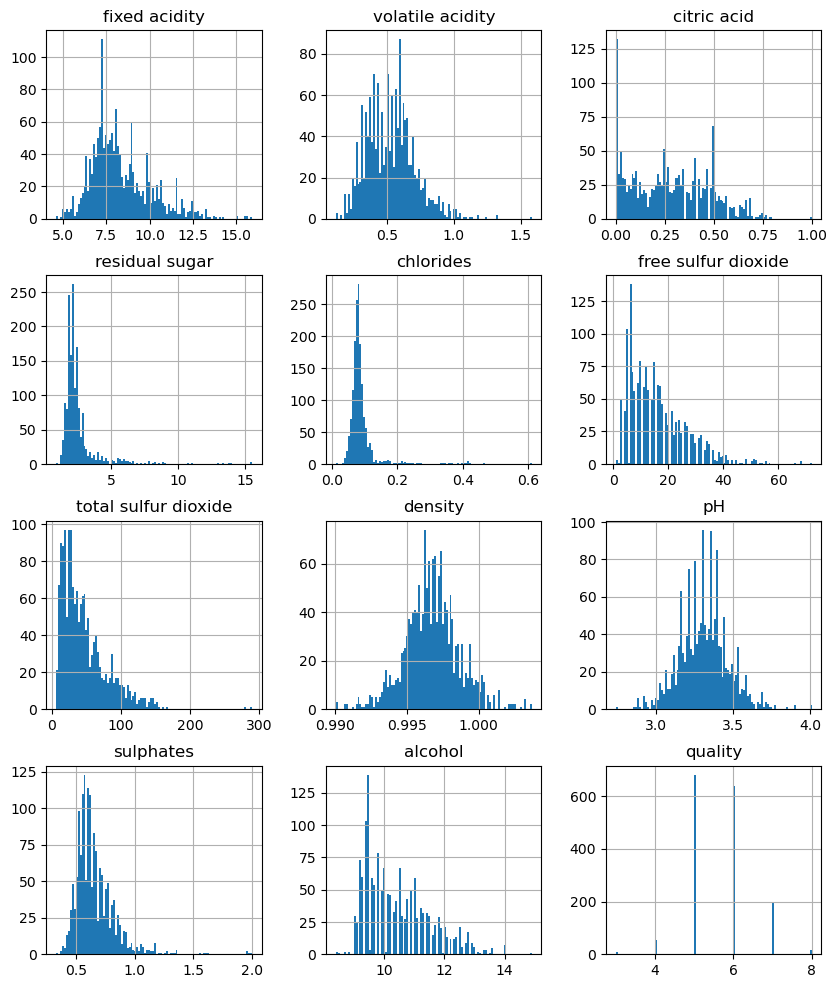

In [7]:
data.hist(bins=100, figsize=(10,12))
plt.show()

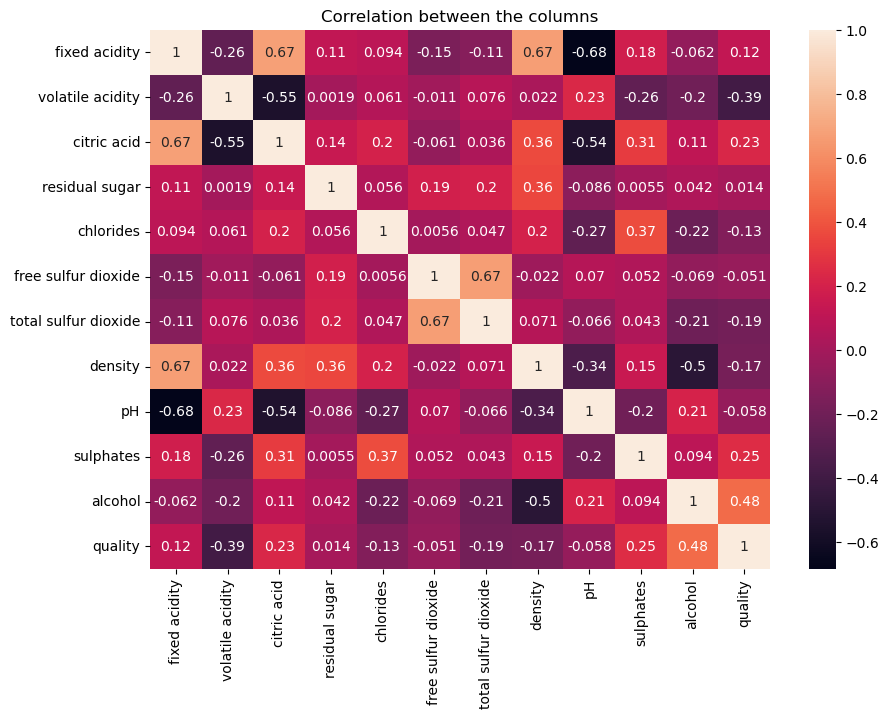

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [19]:
data['quality'] = data.quality.apply(lambda x:1 if x>=7 else 0)


In [20]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [42]:
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=200)

In [43]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1119, 11)
y_train  (1119,)
X_test  (480, 11)
y_test  (480,)


### Logistic Regression Model

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)

In [45]:
print("test accuracy is: {:.2f}%".format(logreg_acc))

test accuracy is: 0.90%
